<a href="https://colab.research.google.com/github/mariacmartins/curso-ia-para-todos/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Crash Course IA - Regressão Linear


Importação das bibliotecas

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mariacmartins/curso-ia-para-todos/main/FuelConsumptionCo2.csv')

#EXIBE A ESTRUTURA DO DATAFRAME
df.head()

MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0       2014  ACURA  ...                       33          196
1       2014  ACURA  ...                       29          221
2       2014  ACURA  ...                       48          136
3       2014  ACURA  ...                       25          255
4       2014  ACURA  ...                       27          244

[5 rows x 13 columns]

In [5]:
df.describe()


MODELYEAR   ENGINESIZE  ...  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
count     1067.0  1067.000000  ...               1067.000000   1067.000000
mean      2014.0     3.346298  ...                 26.441425    256.228679
std          0.0     1.415895  ...                  7.468702     63.372304
min       2014.0     1.000000  ...                 11.000000    108.000000
25%       2014.0     2.000000  ...                 21.000000    207.000000
50%       2014.0     3.400000  ...                 26.000000    251.000000
75%       2014.0     4.300000  ...                 31.000000    294.000000
max       2014.0     8.400000  ...                 60.000000    488.000000

[8 rows x 8 columns]

Selecionar apenas as features do Motor e CO2

In [7]:
motores =  df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]


In [8]:
motores.head()

ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5

In [9]:
co2.head()

CO2EMISSIONS
0           196
1           221
2           136
3           255
4           244

Dividir o dataset em dados de treinamento e dados de teste

In [10]:
motores_treino, motores_teste, co2_treino, co2_teste = train_test_split(motores, co2, test_size=0.2, random_state=42)

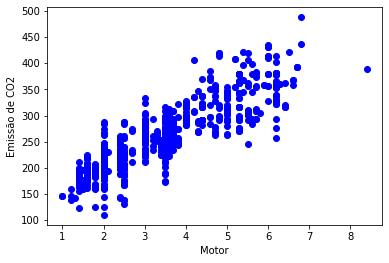

In [11]:
# Exibir a correlação entre as features do dataset de treinamento
plt.scatter(motores_treino, co2_treino, color='blue')
plt.xlabel("Motor")
plt.ylabel("Emissão de CO2")
plt.show()


### Vamos treinar o modelo de regressão linear

In [12]:
# CRIAR UM MODELO DE TIPO DE REGRESSÃO LINEAR
modelo =  linear_model.LinearRegression()

# TREINAR O MODELO USANDO O DATASET DE TESTE
# PARA ENCONTRAR O VALOR DE A E B (Y = A + B.X)
modelo.fit(motores_treino, co2_treino)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)


(A) Intercepto:  [126.28970217]
(B) Inclinação:  [[38.99297872]]


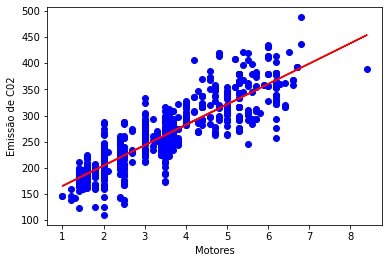

In [14]:
plt.scatter(motores_treino, co2_treino, color='blue')
plt.plot(motores_treino, modelo.coef_[0][0]*motores_treino + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()


### Vamos executar o nosso modelo no dataset de teste

In [16]:
predicoesCo2 = modelo.predict(motores_teste)


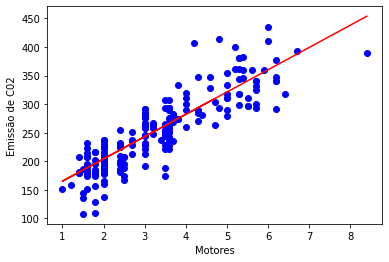

In [17]:
plt.scatter(motores_teste, co2_teste, color='blue')
plt.plot(motores_teste, modelo.coef_[0][0]*motores_teste + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()


In [18]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoesCo2 - co2_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(co2_teste, predicoesCo2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(co2_teste, predicoesCo2))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(co2_teste, predicoesCo2)))
print("R2-score: %.2f" % r2_score(predicoesCo2 , co2_teste) )


Soma dos Erros ao Quadrado (SSE): 210991 
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68


In [20]:
predicoes_Co2 = modelo.predict([[3.7]])

predicoes_Co2

array([[270.56372345]])